# Imports

In [1]:
#Pointing custom import path taken from #https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
import sys
sys.path.append('../modules/')
import eda
import matplotlib.pyplot as plt

In [2]:
#setting a random Seed
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

# Loading in data

In [3]:
#specify if we want to use the train data or test data
train_dataset = 'Training'

In [4]:
train_folders = eda.folders(train_dataset)
train_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 1321 files


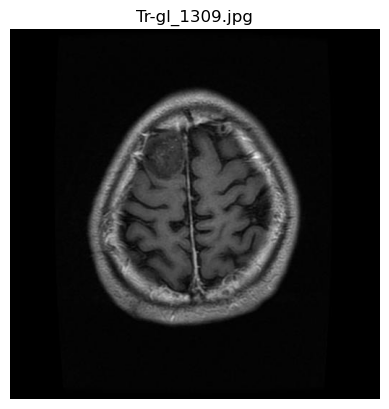

meningioma has 1339 files


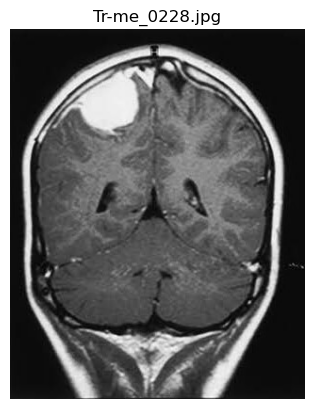

notumor has 1595 files


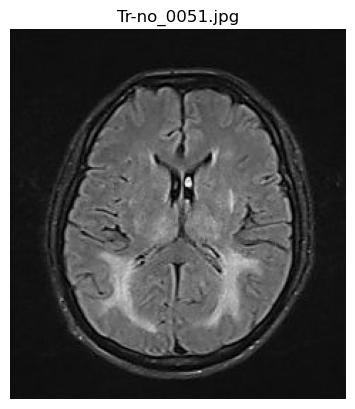

pituitary has 1457 files


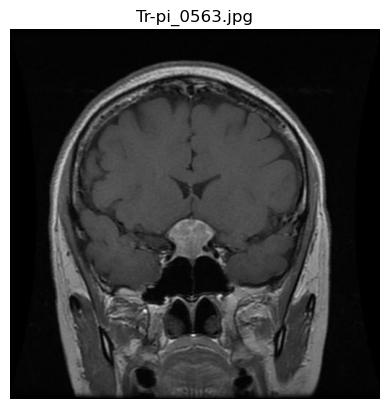

In [5]:
eda.image_len(train_dataset, train_folders)

In [6]:
test_dataset = 'Testing'

In [7]:
test_folders = eda.folders(test_dataset)
test_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 300 files


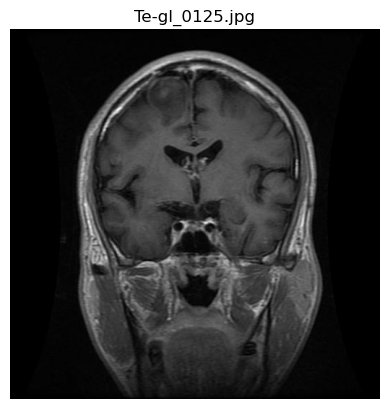

meningioma has 306 files


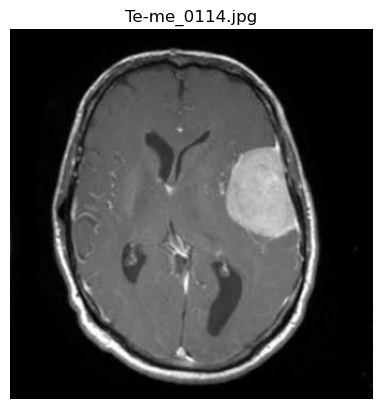

notumor has 405 files


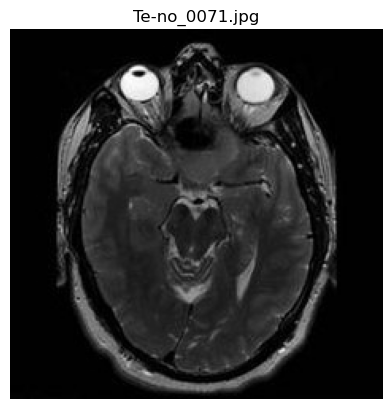

pituitary has 300 files


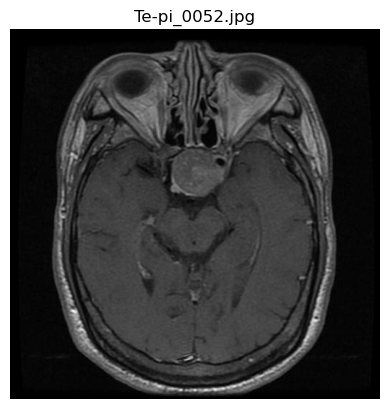

In [8]:
eda.image_len(test_dataset, test_folders)

# Average pixel value
This portion re-uses code from a previous [project](https://github.com/DerikVo/DSI_project_4_plant_disease/blob/main/notebooks/01_Potato_PlantVillageEDA.ipynb). The code was originally developed by chat GPT 4 with the prompt:  "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras." The code has since been corrected, adapted, and changed into a custom module for this project.

Found 1457 images belonging to 1 classes.


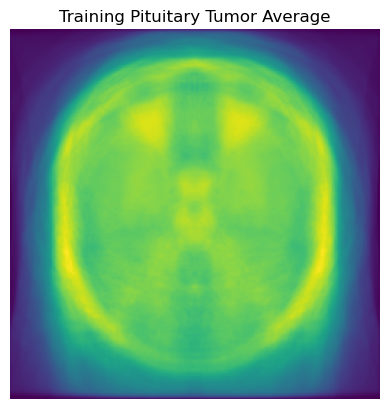

In [33]:
pituitary_tumor  = eda.Image(train_dataset, 'Pituitary')
pituitary_image = pituitary_tumor.avg_images()
plt.title(f'Training Pituitary Tumor Average')
plt.axis('off')
plt.imshow(pituitary_image);

Found 1339 images belonging to 1 classes.


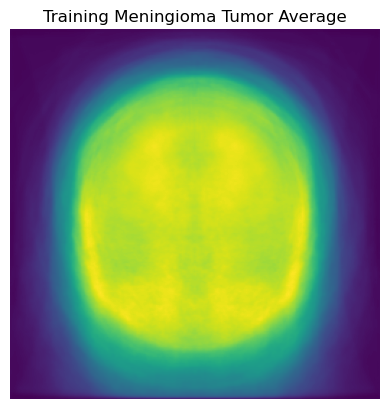

In [34]:
meningioma_tumor = eda.Image(train_dataset, 'meningioma')
meningioma_image = meningioma_tumor.avg_images()
plt.title('Training Meningioma Tumor Average')
plt.axis('off')
plt.imshow(meningioma_image);

Found 1321 images belonging to 1 classes.


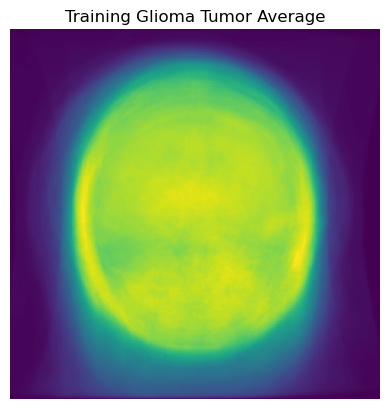

In [35]:
glioma_tumor = eda.Image(train_dataset, 'glioma')
glioma_image = glioma_tumor.avg_images()
plt.title('Training Glioma Tumor Average')
plt.axis('off')
plt.imshow(glioma_image);

Found 1595 images belonging to 1 classes.


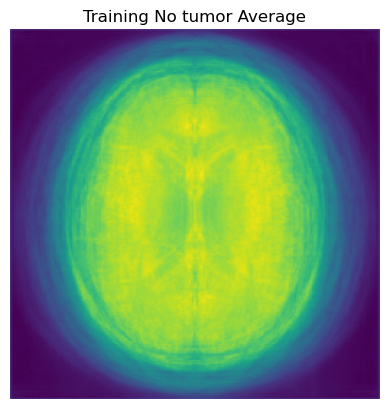

In [36]:
notumor = eda.Image(train_dataset, f'notumor')
notumor_image = notumor.avg_images()
plt.title('Training No tumor Average')
plt.axis('off')
plt.imshow(notumor_image);

# Examine contrast difference between a brain with and without a tumor
This portion uses code from a previous project from this [notebook](https://github.com/DerikVo/DSI_project_4_plant_disease/blob/main/notebooks/01_Potato_PlantVillageEDA.ipynb). The concept was originally developed by [Yasser Siddiqui](syasser126@gmail.com) and has been adapted to use with this notebook.

# Creating a function for contrast

In [51]:
glioma_contrast = eda.image_contrast(glioma_image, notumor_image)
pituitary_contrast = eda.image_contrast(pituitary_image, notumor_image)
meningioma_contrast = eda.image_contrast(meningioma_image, notumor_image)

This portion will display the same contrast using 3 different color maps to support those with colorblindness.

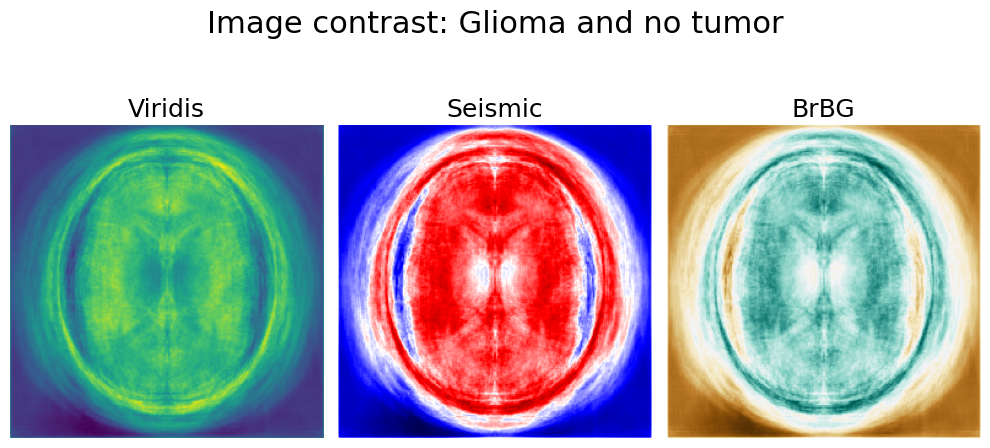

In [70]:
#plotting the contrast between GLioma and no Tumor
fig, ax = plt.subplots(1,3, figsize = (10,10))
plt.suptitle('Image contrast: Glioma and no tumor', y = .75, fontsize = 22)
ax[0].imshow(glioma_contrast)
ax[0].set_title('Viridis', fontsize=18)
ax[0].axis('off')

ax[1].imshow(glioma_contrast, cmap='seismic')
ax[1].set_title('Seismic', fontsize=18)
ax[1].axis('off')

ax[2].imshow(glioma_contrast, cmap='BrBG')
ax[2].set_title('BrBG', fontsize=18)
ax[2].axis('off')
plt.tight_layout()

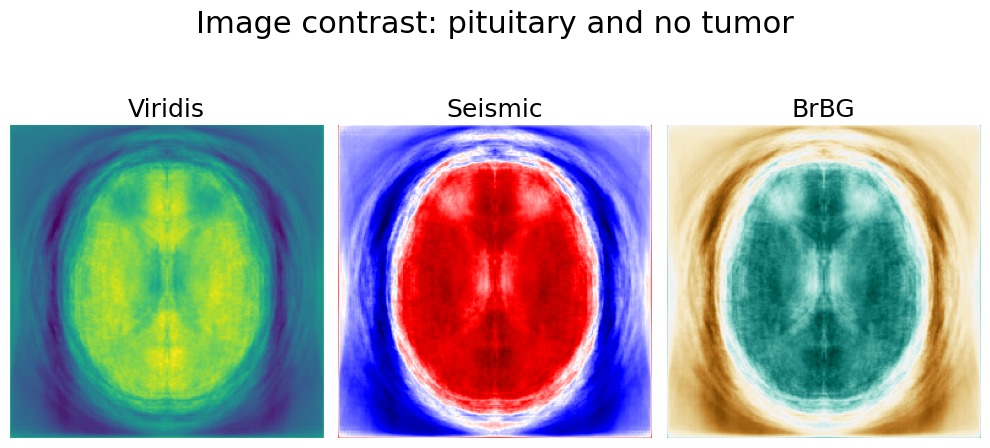

In [71]:
#plotting the contrast between pituitary and no Tumor
fig, ax = plt.subplots(1,3, figsize = (10,10))
plt.suptitle('Image contrast: pituitary and no tumor', y = .75, fontsize = 22)
ax[0].imshow(pituitary_contrast)
ax[0].set_title('Viridis', fontsize=18)
ax[0].axis('off')

ax[1].imshow(pituitary_contrast, cmap='seismic')
ax[1].set_title('Seismic', fontsize=18)
ax[1].axis('off')

ax[2].imshow(pituitary_contrast, cmap='BrBG')
ax[2].set_title('BrBG', fontsize=18)
ax[2].axis('off')
plt.tight_layout()

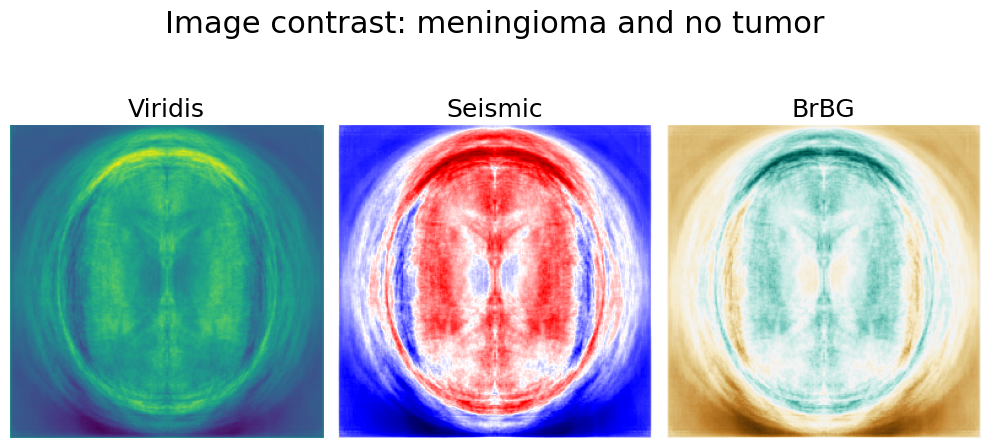

In [72]:
#plotting the contrast between meningioma and no Tumor
fig, ax = plt.subplots(1,3, figsize = (10,10))
plt.suptitle('Image contrast: meningioma and no tumor', y = .75, fontsize = 22)
ax[0].imshow(meningioma_contrast)
ax[0].set_title('Viridis', fontsize=18)
ax[0].axis('off')

ax[1].imshow(meningioma_contrast, cmap='seismic')
ax[1].set_title('Seismic', fontsize=18)
ax[1].axis('off')

ax[2].imshow(meningioma_contrast, cmap='BrBG')
ax[2].set_title('BrBG', fontsize=18)
ax[2].axis('off')
plt.tight_layout()